## 컨볼루션 신경망 (Convolution Neural Network, CNN)
### - 완전 연결 네트워크의 문제점으로부터 시작
- 매개 변수의 폭발적인 증가
- 공간 추론의 부족 : 픽셀 사이의 근접성 개념이 완전 연결계층 (Fully Connected Layer)에서는 손실됨

### - 동물의 시각적 피질 (visual cortex)의 구조에서 영감을 받아 만들어진 딥러닝 신경망
### - 시각피질의 신경세포
- 시야 내의 특정 영역에 대한 자극만 수용
- 수용장 (receptive field)
- 해당 영역의 특정 특징에 대해서만 반응

#### 1. 시각 자극이 1차 시각피질을 통해서 처리된 다음, 2차 시각피질을 경유하여, 4차 시각피질 등 여러 영역을 통과하여 계층적인 정보 처리

#### 2. 정보가 계층적으로 처리되어 가면서 점차 추상적인 특징이 추출되어 시각 인식

#### 3. 동물의 계층적 특징 추출과 시각인식 체계를 참조하여 만들어진 모형
- 전반부 : 컨볼루션 연산을 수행하여 특징 추출
- 후반부 : 특징을 이용하여 분류

#### 4. 영상 분류, 문자 인식 등 인식문제에 높은 성능

## 컨볼루션 연산 
#### 1. 필터 연산
- 입력 데이터에 필터를 통한 어떠한 연산을 진행
- 필터에 대응하는 원소끼리 곱하고, 그 합을 구함
- 연산이 완료된 결과 데이터를 특정 맵이라 부름

#### 2. 필터 
- 커널(kernel) 이라고도 함
- 이미지 처리에서 사용하는 이미지 필터와 비슷한 개념
- 필터의 사이즈는 거의 항상 홀수
  - 짝수이면 패딩이 비대칭이 되어버린
  - 왼쪽, 오른쪽을 다르게 주어야 함
  - 중심위치가 존재, 즉 구별된 하나의 픽셀이 존재
- 과적합 방지 가능



#### 3. 입력 사이즈 
일반적으로 합성곱 연산을 한 후의 데이터 사이즈 

(n-f+1) * (n-f+1)

- n : 입력데이터의 크기
- f : 필터(커널)의 크기

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.layers import Conv2D

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_16979/3919793888.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


float64
(427, 640, 3)


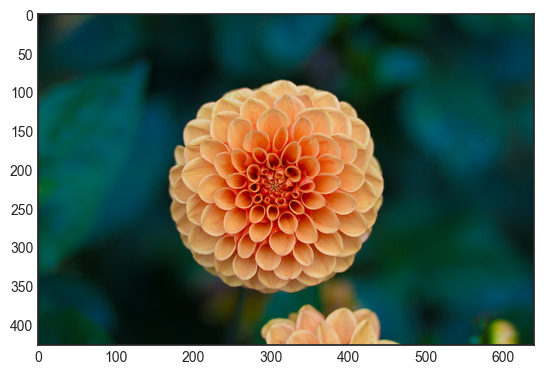

In [5]:
flower = load_sample_image('flower.jpg') / 255      # 0~255의 값 대신 0~1사이의 값을 갖게 함
print(flower.dtype)
print(flower.shape)
plt.imshow(flower)
plt.show()

float64
(427, 640, 3)


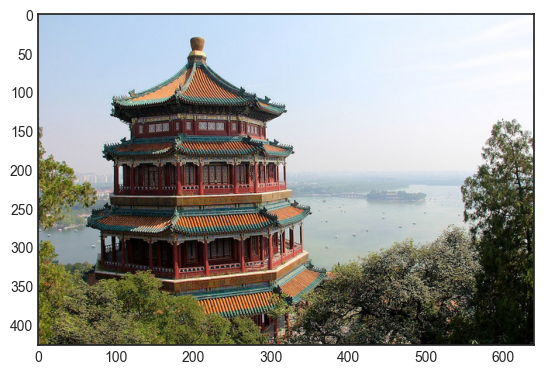

In [6]:
china = load_sample_image('china.jpg')/255
print(china.dtype)
print(china.shape)
plt.imshow(china)
plt.show()

In [8]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)     # 이미지 2개, 높이 427, 넓이 640, 채널 3

(2, 427, 640, 3)


In [9]:
filters = np.zeros(shape = (7,7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

print(filters.shape)

(7, 7, 3, 2)


In [10]:
conv = Conv2D(filters=16, kernel_size=3, activation= 'relu')

## 패딩(Padding)과 스트라이드 
- 필터(커널) 사이즈와 함께 입력이미지와 출력이미지의 사이즈를 결정하기 위해 사용

#### 1. 패딩
- 입력 데이터의 주변 값을 주로 0으로 채움
- 출력 데이터의 크기 : (n+2p-f+1) * (n+2p-f+1)
 - 필터의 크기 : f
 - 입력 데이터의 크기 : n
 - 패딩 값 : p
- valid
 - 패딩을 주지 않음
 - padding = 0 은 채워진 테두리가 아닌 패딩을 주지 않는다는 의미
- same
 - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게 유지
 - 만약 필터(커널)의 크기가 k이면, 패딩의 크기는 p = (k-1) / 2 (단, stride=1)


 #### 2. 스트라이드 (stride)
 - 필터를 적용하는 간격을 의미
 - 출력 데이터의 크기 
  - OH = (H+2P-FH) / 2 + 1
  - OW = (W+2P-FW) / 2 + 1
  - 입력 크기 : (H,W)
  - 필터 크기 : (FH, FW)
  - 페딩, 스트라이드 : P, S
  - 정수로 나누어 떨어지지 않으면, 패딩, 스트라이드 값을 조정하여 정수어 나누어 떨어지게 해야함


#### 3. 폴링(Pooling)
- 필터(커널)사이즈 내에서 특정 값을 추출하는 과정
- Max Pooiling : 가장 많이 사용되는 방법으로 stride=2, kernel_size=2를 통해 특징맵의 크기를 절반으로 줄여 모델이 물체의 중요한 특징만을 추출하게 함

In [15]:
# max pooling
from tensorflow.keras.layers import MaxPool2D

flower = load_sample_image('flower.jpg') / 255
flower = np.expand_dims(flower, axis=0)
print(flower.shape)

output = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', activation='relu')(flower)
output = MaxPool2D(pool_size=2)(output)
print(output.shape)

(1, 427, 640, 3)
(1, 213, 320, 32)


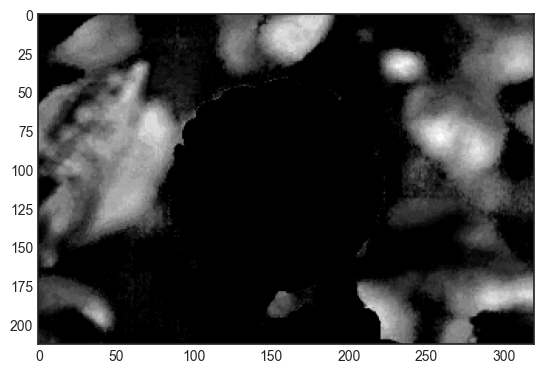

In [18]:
plt.imshow(output[0,:, :, 8], cmap='gray')
plt.show()

- 평균 풀링 (Avg Pooling)
  - 필터 내에 있는 픽셀 값의 평균을 구하는 과정
  - 과거에 많이 사용, 요즘은 잘 사용되지 않음
  - 맥스 풀링과 마찬가지로 stide=2, kernel_size=2를 통해 특정 맵의 사이즈를 줄임

In [23]:
from tensorflow.keras.layers import AvgPool2D

output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation = 'relu')(flower)
output = AvgPool2D(pool_size=2)(output)
print(output.shape)     # 사이즈가 반으로 줄음

(1, 213, 320, 32)


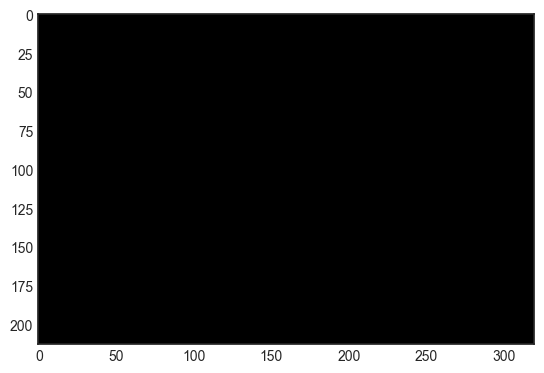

In [24]:
plt.imshow(output[0,:,:,2], cmap='gray')
plt.show()

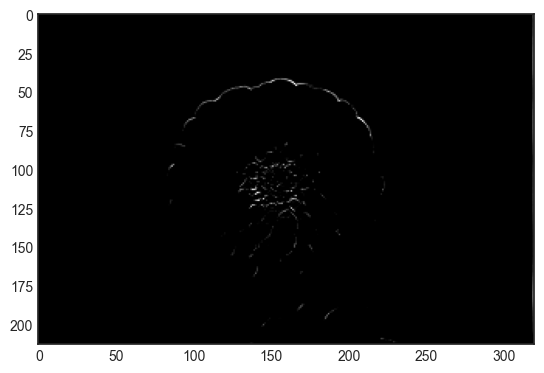

In [25]:
plt.imshow(output[0,:,:,8], cmap='gray')
plt.show()

- 전역 평균 풀링 (Global Avg Pooling)
  - 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음
  - 출력층에는 유용할 수 있음

In [29]:
from tensorflow.keras.layers import GlobalAvgPool2D

print(flower.shape)
output = Conv2D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu')(flower)
output = GlobalAvgPool2D()(output)
print(output.shape)

(1, 427, 640, 3)
(1, 32)


#### 4. 완전 연결 계층 (Fully-Connected Layer)
- 입력으로 받은 텐서를 1차원으로 평면화(flatten) 함
- 밀집 계층(Dense Layer)라고도 함
- 일반적으로 분류기로서 네트워크의 마지막 계층에서 사용

In [31]:
from tensorflow.keras.layers import Dense

output_size = 64
fc = Dense(units=output_size, activation='relu')

#### 5. 유효 수용 영역 (ERF, Effective Receptive Field)
- 입력 이미지에서 거리가 먼 요소를 상호 참조하여 결합하여 네트워크 능력에 영향을 줌
- 입력 이미지의 영역을 정의해 주어진 계층을 위한 뉴런의 활성화에 영향을 미침
- 한 계층의 필터 크기나 윈도우 크기로 불리기 때문에 RF(Receptive field, 수용 영역)이라는 용어를 흔히 볼 수 있음
- RF의 중앙에 위치한 픽셀은 주변의 픽셀보다 더 높은 가중치를 가짐
  - 중앙부에 위치한 픽셀은 여러 개의 계층을 전파한 값
  - 중앙부에 위치한 픽셀은 주변에 위치한 픽셀보다 더 많은 정보를 가짐
- 가우시안 분포를 따름


### CNN 모델 학습

### MNIST (LeNet)
- Yann Lecan 등의 제안
- 5계층 구조
- 입력 : 32*32 필기체 숫자 영상 (MNIST 데이터)
- 풀링 : 가중치 (2*2블록의 합) + 편차항
- 시그모이드 활성화 함수 사용
- 성능 : 오차율 0.95 (정확도 : 99.05%)

In [32]:
# 모듈 임포트
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist

In [35]:
# 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train[:,:,:, np.newaxis], X_test[:,:,:, np.newaxis]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


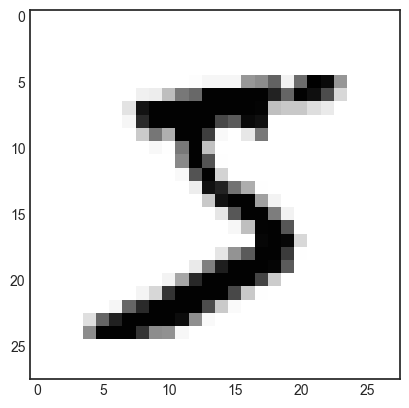

In [36]:
plt.imshow(X_train[0, :, :, 0])

In [37]:
# Normalize
X_train, X_test = X_train/255.0, X_test/255.0

In [38]:
# 모델 구성 및 컴파일
num_classes = 10
epochs = 30
batch_size = 32

In [40]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.conv1 = Conv2D(6,kernel_size=(5,5), padding='same', activation='relu')
        self.conv2 = Conv2D(16, kernel_size=(5,5), activation='relu')
        self.max_pool = MaxPool2D(pool_size=(2,2))
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')
        
    def call(self, input_data):
        x = self.max_pool(self.conv1(input_data))
        x = self.max_pool(self.conv2(x))
        x = self.flatten(x)
        x = self.dense3(self.dense2(self.dense1(x)))
        
        return x

In [41]:
model = LeNet5(num_classes)

In [44]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
# val_loss 값이 3번 동안 변화하지 않으면 모델 실행 중단
callbacks = [EarlyStopping(patience=3, monitor='val_loss'),
             TensorBoard(log_dir='./logs', histogram_freq = 1)]

In [46]:
# 모델 학습 및 평가
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs=epochs,
          validation_data = (X_test, y_test),
          callbacks=callbacks)

Epoch 1/30


2022-12-01 16:17:41.857346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 16:17:42.249143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.4881 - accuracy: 0.8549

2022-12-01 16:17:57.177804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.4875 - accuracy: 0.8551 - val_loss: 0.1339 - val_accuracy: 0.9588
Epoch 2/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1221 - accuracy: 0.9623 - val_loss: 0.0886 - val_accuracy: 0.9701
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0914 - accuracy: 0.9716 - val_loss: 0.0715 - val_accuracy: 0.9767
Epoch 4/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 5/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.0548 - val_accuracy: 0.9825
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0466 - val_accuracy: 0.9842
Epoch 7/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0434 - val_accuracy: 0.9

In [47]:
%load_ext tensorboard

In [48]:
%tensorboard --logdir logs

#### Fashion MNIST

In [49]:
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_16979/1778110924.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [50]:
# 데이터 로드 및 전처리

(X_train, y_train), (X_test, y_test) = load_data()

X_train = X_train[:,:,:, np.newaxis]
X_test = X_test[:,:,:, np.newaxis]

X_train, X_test = X_train / 255.0, X_test/255.0
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [51]:
class_name = ['T-shirts/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle Boots']

In [54]:
def build_model():
    model = Sequential()
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(64, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)
    
    
    model = Model(inputs=[input], outputs=output)
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    return model

model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 30976)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               3965056   
                                                                 
 dense_6 (Dense)             (None, 64)                8256  

In [56]:
hist_1  = model_1.fit(X_train, y_train,
                      epochs=25,
                      validation_split = 0.3,
                      batch_size = 128)

Epoch 1/25


2022-12-01 16:59:56.458265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.5231 - acc: 0.8140

2022-12-01 17:00:04.908434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 10s 26ms/step - loss: 0.5231 - acc: 0.8140 - val_loss: 0.4062 - val_acc: 0.8529
Epoch 2/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3528 - acc: 0.8709 - val_loss: 0.3517 - val_acc: 0.8729
Epoch 3/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2943 - acc: 0.8902 - val_loss: 0.3790 - val_acc: 0.8644
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2464 - acc: 0.9076 - val_loss: 0.3736 - val_acc: 0.8718
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2125 - acc: 0.9203 - val_loss: 0.3935 - val_acc: 0.8685
Epoch 6/25
329/329 [==============================] - 8s 25ms/step - loss: 0.1907 - acc: 0.9307 - val_loss: 0.4235 - val_acc: 0.8667
Epoch 7/25
329/329 [==============================] - 9s 27ms/step - loss: 0.1635 - acc: 0.9385 - val_loss: 0.4888 - val_acc: 0.8642
Epoch 8/25
329/329 [==============================] - 8s 25ms/step - loss: 0.13

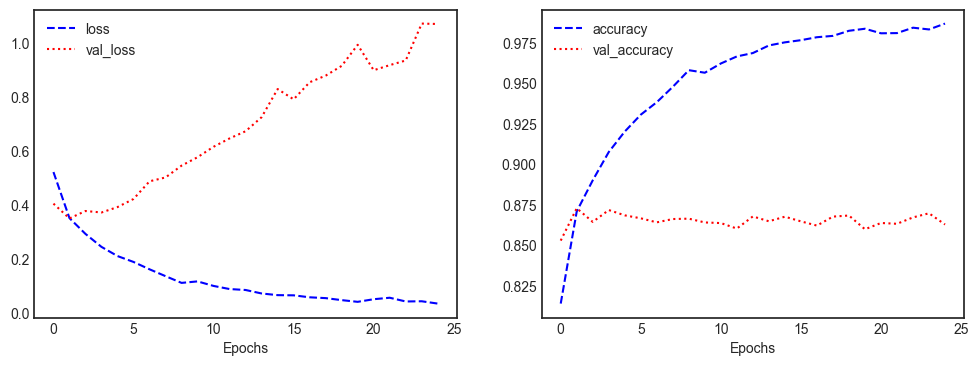

In [58]:
hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid
plt.legend()

validation loss는 상승, validation acc는 하락으로 오버피팅됨

In [59]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.1430 - acc: 0.8585


[1.1429530382156372, 0.858500063419342]

In [62]:
# 과대적합 방지 - 하이퍼파라미터 수 비교

def build_model2():
    model = Sequential()
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = MaxPool2D(strides=(2,2))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(64, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(10, activation='softmax')(output)
    
    
    model = Model(inputs=[input], outputs=output)
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    return model

model_2 = build_model2()
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                      

In [66]:
hist_2 = model_2.fit(X_train, y_train,
                     epochs=40,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 0.5453 - acc: 0.8070

2022-12-01 17:12:28.585028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 7s 20ms/step - loss: 0.5453 - acc: 0.8070 - val_loss: 0.6134 - val_acc: 0.7869
Epoch 2/40
329/329 [==============================] - 6s 18ms/step - loss: 0.5124 - acc: 0.8160 - val_loss: 0.5546 - val_acc: 0.8019
Epoch 3/40
329/329 [==============================] - 6s 18ms/step - loss: 0.4931 - acc: 0.8248 - val_loss: 0.5623 - val_acc: 0.8067
Epoch 4/40
329/329 [==============================] - 6s 18ms/step - loss: 0.4660 - acc: 0.8339 - val_loss: 0.4949 - val_acc: 0.8239
Epoch 5/40
329/329 [==============================] - 6s 19ms/step - loss: 0.4484 - acc: 0.8401 - val_loss: 0.5021 - val_acc: 0.8285
Epoch 6/40
329/329 [==============================] - 6s 18ms/step - loss: 0.4332 - acc: 0.8465 - val_loss: 0.4573 - val_acc: 0.8428
Epoch 7/40
329/329 [==============================] - 6s 18ms/step - loss: 0.4199 - acc: 0.8499 - val_loss: 0.4802 - val_acc: 0.8382
Epoch 8/40
329/329 [==============================] - 6s 18ms/step - loss: 0.408

accuracy가 높지 않음

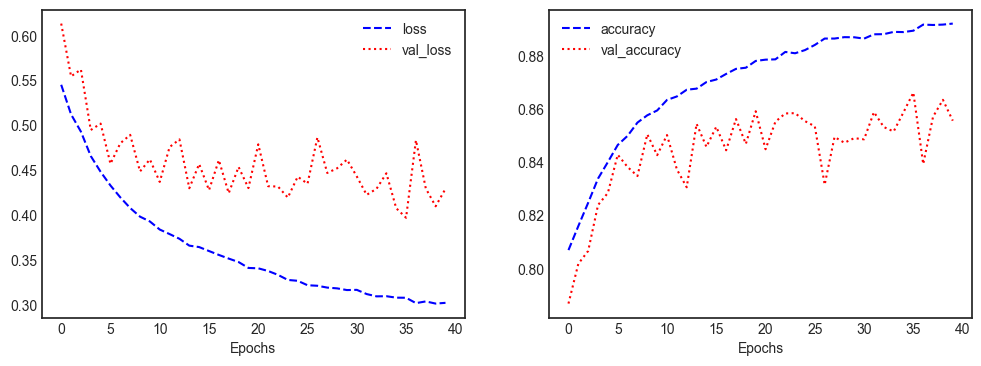

In [67]:
hist_2.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid
plt.legend()

dropout으로 인해 과적합은 방지함

In [68]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4554 - acc: 0.8461


[0.45537227392196655, 0.8461000323295593]

In [69]:
# 모델 성능 높이기 : 레이어 추가

from tensorflow.keras.layers import BatchNormalization

def build_model3():
    model = Sequential()
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
    output = BatchNormalization()(output)
    
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    
    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Flatten()(output)
    output = Dense(512, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(256, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(10, activation='softmax')(output)
    
    
    model = Model(inputs=[input], outputs=output)
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    return model

model_3 = build_model3()
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_12 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                      

In [70]:
hist_3 = model_3.fit(X_train, y_train,
                     epochs=25,
                     validation_split = 0.3,
                     batch_size=128)

Epoch 1/25


2022-12-01 17:28:45.185421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.7387 - acc: 0.7300

2022-12-01 17:29:06.201417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 24s 64ms/step - loss: 0.7387 - acc: 0.7300 - val_loss: 2.3622 - val_acc: 0.0988
Epoch 2/25
329/329 [==============================] - 19s 59ms/step - loss: 0.4222 - acc: 0.8490 - val_loss: 0.9965 - val_acc: 0.6955
Epoch 3/25
329/329 [==============================] - 20s 59ms/step - loss: 0.3553 - acc: 0.8758 - val_loss: 0.6875 - val_acc: 0.7962
Epoch 4/25
329/329 [==============================] - 19s 59ms/step - loss: 0.3151 - acc: 0.8884 - val_loss: 0.6225 - val_acc: 0.8152
Epoch 5/25
329/329 [==============================] - 19s 58ms/step - loss: 0.2872 - acc: 0.8992 - val_loss: 0.6915 - val_acc: 0.7917
Epoch 6/25
329/329 [==============================] - 19s 59ms/step - loss: 0.2681 - acc: 0.9040 - val_loss: 0.6423 - val_acc: 0.7447
Epoch 7/25
329/329 [==============================] - 19s 58ms/step - loss: 0.2523 - acc: 0.9113 - val_loss: 0.5613 - val_acc: 0.8139
Epoch 8/25
329/329 [==============================] - 19s 59ms/step - los

과대적합은 되지 않았고, 층을 늘려도 좋은 성능을 낼 수 있음